# Introduction to pandas
* The premier data science library
* Has two main objects : DataFrame, Series
* Is a wrapper around, among other libraries, NumPy and matplotlib
* Series is a vector of data with an index
* DataFrame is a collection of Series with a single index
* The name pandas derives from panel data 
* Was developed by a quant working for a hedge fund, long since retired by the age of about 27


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.1.3'

* create a folder named data in the same directory as your notebook 
* download Archive.zip into it
* extract the contents of Archive.zip (may take a minute or two)

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [4]:
cast = pd.read_csv('data/cast.csv', encoding='utf-8')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


### basic operations
* df.head([optional value])
* df.tail([optional value])
* df['column name'] or df.column_name to subset by columns
* df[['col1, col2, col...']]
* df[column.isnull()]
* df[column.notnull()]
* df[column == some value] 
* df[(df.column > some value) & (df.column < some value)]
* df.sort_values(by=column, ascending=False) # for descending order
* df['column'].str.any_string_method
* df.index --> returns the index of df or subset
* df.sort_index()
* df.plot --> wrapper around matplotlib

In [25]:
titles['title']

0                    Ankara ekspresi
1           Ans Vaterland, ans teure
2                        Miss Mohini
3                      La vera madre
4                       O Amerikanos
                     ...            
226008                    Armageddon
226009                  Verit i znat
226010                   Muukalainen
226011    Byeolmyeongbuteun unjeonsa
226012              Red Headed Woman
Name: title, Length: 226013, dtype: object

In [22]:
titles['title'].head()

0             Ankara ekspresi
1    Ans Vaterland, ans teure
2                 Miss Mohini
3               La vera madre
4                O Amerikanos
Name: title, dtype: object

In [15]:
titles[['title', 'year']].head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [5]:
titles['decade'] = titles.year // 10 * 10
titles.head()

,title,year,decade
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990


In [18]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226013 non-null  object
 1   year    226013 non-null  int64 
 2   decade  226013 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.2+ MB


In [30]:
titles[titles.year == 2010]

5663

In [36]:
titles[titles['title'].str.contains('Lord of the Rings')]

,title,year,decade
47889,The Lord of the Rings: The Fellowship of the Ring,2001,2000
154780,The Lord of the Rings,1978,1970
155233,The Lord of the Rings: The Return of the King,2003,2000
182919,The Lord of the Rings Symphony,2003,2000
188481,The Lord of the Rings: The Two Towers,2002,2000


In [40]:
# you need to use & for compound pipe for or
len(titles[(titles.year >= 2010) & (titles.year < 2020)])

65830

<AxesSubplot:>

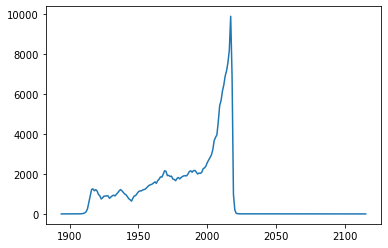

In [53]:
titles['year'].value_counts().sort_index().plot()

In [51]:
titles[titles.year == 2023]

,title,year,decade
29285,Downfall Warfare,2023,2020
61477,Roughneck Riders,2023,2020
84876,The Zero Century: Harlock,2023,2020
116759,2 Seconds,2023,2020
150207,Dag III,2023,2020


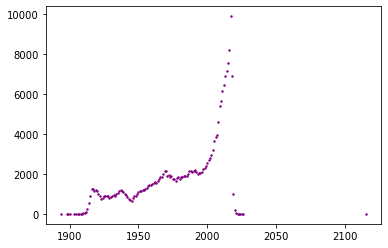

In [52]:
vals = titles['year'].value_counts()
index = titles['year'].value_counts().index
plt.scatter(index, vals, s=2, c='purple');

In [47]:
len(titles)

226013

# Problems

### 1. How many movies are in the titles dataframe

### 2. How many movies have the title North by Northwest

### 3. How many version of Hamlet are there, when was the first made? the last?

### 4. List all the movies called Treasure Island from oldest to newest

In [ ]:
# sorry I forgot to show an example of sorting on a column:
# instead of sort_index, it's sort_values(by='column_name')

### 5. How many movies were made in 1950? 1980? 2000?

### 6. How many movies were made between 1950 and 1959? 1980 - 1989? 2000 - 2009

### 7. How big was the cast of Metropolis

### 8. How many roles for actors were there 1950's? 1990's

### 9. How many roles for actors were there 1950's? 1990's

### 10. How many "leading roles" were there in the 2000's?

In [8]:
len(cast[(cast.year>= 2000) & (cast.year < 2010) & (cast.n == 1)])

23593

### 11. How many roles received no ranking in the 2000's? 1950's

### 12. Plot the number of films made in each decade

### 13. Plot the number of films with a Rustler character over time

<AxesSubplot:>

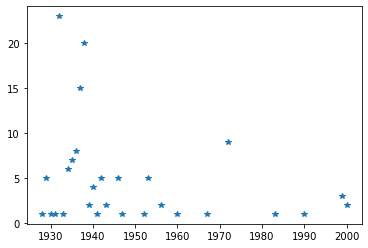

In [24]:
cast.year[cast['character'] =='Rustler' ].value_counts().sort_index().plot(style="*")

### 14. What are the top ten character names of all time?

### 15. Which actor appeared in the most films in the 1990's decade?

### 16. What are the top 10 roles that start with Science?